# Prediction Intervals

Prediction intervals provide a measure of the uncertainty in the forecasted values. In time series forecasting, a prediction interval gives an estimated range within which a future observation will fall, based on the level of confidence or uncertainty you set. This level of uncertainty is crucial for making informed decisions, risk assessments, and planning.

For instance, a 95% prediction interval means that 95 out of 100 times, the actual future value will fall within the estimated range. Therefore, a wider interval indicates greater uncertainty about the forecast, while a narrower interval suggests higher confidence.

When using TimeGPT for time series forecasting, you have the option to set the level of prediction intervals according to your requirements. TimeGPT uses conformal prediction to calibrate the intervals.

In [ ]:
#| hide
from nixtlats.utils import colab_badge

In [ ]:
#| echo: false
colab_badge('docs/tutorials/4_prediction_intervals')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/tutorials/4_prediction_intervals.ipynb)

In [ ]:
#| hide
from itertools import product

from fastcore.test import test_eq, test_fail, test_warns
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()

True

In [ ]:
import pandas as pd
from nixtlats import TimeGPT

/home/ubuntu/miniconda/envs/nixtlats/lib/python3.11/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [ ]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'my_token_provided_by_nixtla'
)

In [ ]:
#| hide
timegpt = TimeGPT()

When using TimeGPT for time series forecasting, you can set the level (or levels) of prediction intervals according to your requirements. Here's how you could do it:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
timegpt_fcst_pred_int_df = timegpt.forecast(
    df=df, h=12, level=[80, 90, 99.7], 
    time_col='timestamp', target_col='value',
)
timegpt_fcst_pred_int_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: MS
INFO:nixtlats.timegpt:Restricting input...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,timestamp,TimeGPT,TimeGPT-lo-99.7,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-hi-99.7
0,1961-01-01,437.837921,415.826453,423.783707,431.987061,443.688782,451.892136,459.849389
1,1961-02-01,426.062714,402.833523,407.694061,412.704926,439.420502,444.431366,449.291904
2,1961-03-01,463.116547,423.434062,430.316862,437.412534,488.820560,495.916231,502.799032
3,1961-04-01,478.244507,444.885193,446.776764,448.726837,507.762177,509.712250,511.603821
4,1961-05-01,505.646484,465.736694,471.976787,478.409872,532.883096,539.316182,545.556275


In [ ]:
#| hide
# test shorter horizon
level_short_horizon_df = timegpt.forecast(
    df=df, h=6, level=[80, 90, 99.7], 
    time_col='timestamp', target_col='value',
)
test_eq(
    level_short_horizon_df.shape,
    (6, 8)
)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: MS
INFO:nixtlats.timegpt:Restricting input...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


In [ ]:
#| hide
test_level = [80, 90.5]
cols_fcst_df = timegpt.forecast(
    df=df, h=12, level=[80, 90.5], 
    time_col='timestamp', target_col='value',
).columns
assert all(f'TimeGPT-{pos}-{lv}' for pos, lv in product(test_level, ['lo', 'hi']) )

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: MS
INFO:nixtlats.timegpt:Restricting input...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


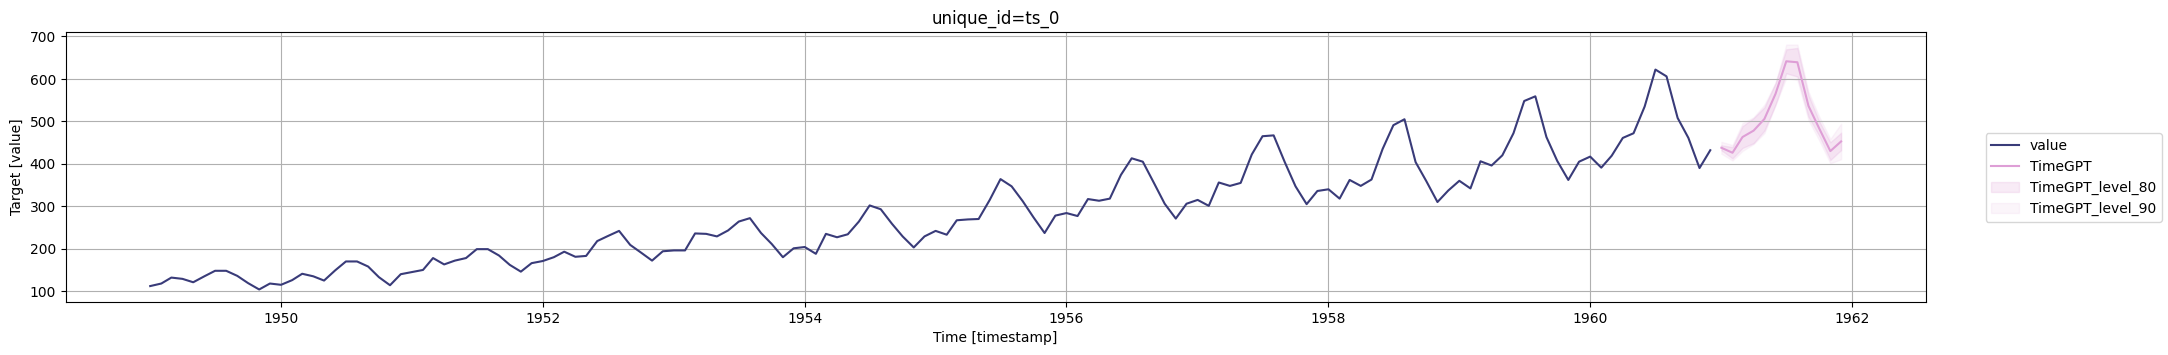

In [ ]:
timegpt.plot(
    df, timegpt_fcst_pred_int_df, 
    time_col='timestamp', target_col='value',
    level=[80, 90],
)

It's essential to note that the choice of prediction interval level depends on your specific use case. For high-stakes predictions, you might want a wider interval to account for more uncertainty. For less critical forecasts, a narrower interval might be acceptable.

#### Historical Forecast

You can also compute prediction intervals for historical forecasts adding the `add_history=True` parameter as follows:

In [ ]:
timegpt_fcst_pred_int_historical_df = timegpt.forecast(
    df=df, h=12, level=[80, 90], 
    time_col='timestamp', target_col='value',
    add_history=True,
)
timegpt_fcst_pred_int_historical_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: MS
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...


,timestamp,TimeGPT,TimeGPT-lo-80,TimeGPT-lo-90,TimeGPT-hi-80,TimeGPT-hi-90
0,1951-01-01,135.483673,111.937767,105.262830,159.029579,165.704516
1,1951-02-01,144.442413,120.896508,114.221571,167.988319,174.663256
2,1951-03-01,157.191910,133.646004,126.971067,180.737815,187.412752
3,1951-04-01,148.769379,125.223473,118.548536,172.315284,178.990221
4,1951-05-01,140.472946,116.927041,110.252104,164.018852,170.693789


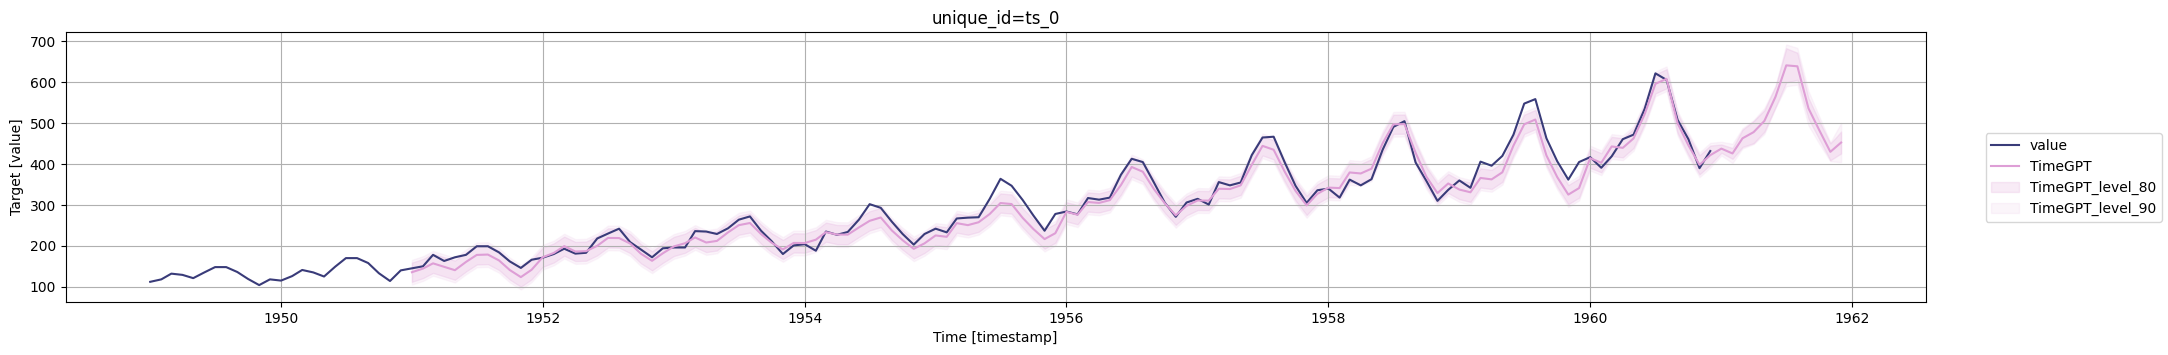

In [ ]:
timegpt.plot(
    df, timegpt_fcst_pred_int_historical_df, 
    time_col='timestamp', target_col='value',
    level=[80, 90],
)